<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Firstname Lastname](https://) for the 2022 Text Analysis Pedagogy Institute, with support from the [National Endowment for the Humanities](https://neh.gov), [JSTOR Labs](https://labs.jstor.org/), and [University of Arizona Libraries](https://new.library.arizona.edu/).

For questions/comments/improvements, email author@email.address.<br />
____

# `spaCy 3` `1`

This is lesson `1` of 3 in the educational series on `spaCy and NLP`. This notebook is intended `to teach the spaCy EntityRuler and the basics of Rules-Based NLP`. 

**Audience:** `Teachers` / `Learners` / `Researchers`

**Use case:** `Tutorial` / `How-To` / `Explanation` 

`Include the use case definition from [here](https://constellate.org/docs/documentation-categories)`

**Difficulty:** `Intermediate`

`Beginner assumes users are relatively new to Python and Jupyter Notebooks. The user is helped step-by-step with lots of explanatory text.`
`Intermediate assumes users are familiar with Python and have been programming for 6+ months. Code makes up a larger part of the notebook and basic concepts related to Python are not explained.`
`Advanced assumes users are very familiar with Python and have been programming for years, but they may not be familiar with the process being explained.`

**Completion time:** `90 minutes`

**Knowledge Required:** 
```
* Python basics (variables, flow control, functions, lists, dictionaries)
* A basic understanding of spaCy (see notebooks 1-3)
```

**Knowledge Recommended:**
```
* Basic file operations (open, close, read, write)
* Loading data with Pandas
```

**Learning Objectives:**
After this lesson, learners will be able to:
```
1. Learn about the basics of machine learning and the machine learning components of spaCy
```
___

In [1]:
# ### Install Libraries ###

# # Using !pip installs
# !pip install spacy
# !pip install pandas
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
!pip install umap-learn umap-learn[plot]
# !pip install hbdscan

# # Using %%bash magic with apt-get and yes prompt

  Using cached bokeh-3.2.1-py3-none-any.whl (7.8 MB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.2
    Uninstalling bokeh-2.3.2:
      Successfully uninstalled bokeh-2.3.2


In [2]:
import pandas as pd
from spacy import displacy
import spacy
import umap
import umap.plot
import hdbscan

/home/wjbmattingly/anaconda3/envs/spacy35/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/wjbmattingly/anaconda3/envs/spacy35/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/wjbmattingly/anaconda3/envs/spacy35/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currentl

# What is Machine Learning?

Machine learning, or ML, is the process by which we train computer systems to perform specific tasks. This is achieved through statistics and neural networks. We won't be diving into specifically how machine learning works, rather some of the fundamental concepts necessary to understand how to leverage machine learning systems and, most importantly be aware of their expected limitations.

There are many types of machine learning: supervised learning, unsupervised learning, reinforcement learning, semi-supervised learning, etc. In this notebook, we will cover supervised and unsupervised learning.

When working with texts, the backbone of all machine learning lies in quality word vectors. Word vectors, or word embeddings, are complex numerical representations of text that ideally contain semantic and syntactic information. A vector is created via a language model that has examined large quantities of texts and learned what specific words mean relative to other words. Words that have similar usages will have similar numerical values.

It should be emphasized similar usages does not correlate to synonyms. In the context of Harry Potter, for example, Hufflepuff and Slytherin may be mapped close to each other in a lnaguage model, but these are completely opposite houses in Harry Potter. Why would they be mapped close to each other? Because they frequently appear in similar contexts and are linked by a larger conceptually idea of a Hogwarts House.

Throughout this notebook, we will learn about word vectors as we learn about machine learning concepts. For now, let's dive into word vectors with our Lord of the Rings text:

In [3]:
with open("../data/lotr.txt", "r") as f:
    text = f.read().strip()


In [4]:
text[:250]

'Next day Frodo woke early, feeling refreshed and well. He walked along the terraces above the loud-flowing Bruinen and watched the pale, cool sun rise above the far mountains, and shine down. Slanting through the thin silver mist; the dew upon the ye'

For this notebook, we will use the medium model from spaCy, but these precise same steps can be done with the large model. The transformer model requires a few extra steps to perform similar tasks.

In [5]:
nlp = spacy.load("en_core_web_lg")

In [6]:
doc = nlp(text[:2500])

In [7]:
displacy.render(doc, style="ent")

Let's now take a look at our first token, `Next`.

In [8]:
doc[0]

Next

We can examine its vector by using `.vector`

In [9]:
doc[0].vector

array([ 4.2548e+00,  2.2683e+00,  3.4192e-01,  8.2185e-01,  2.6180e+00,
        7.1039e-01,  2.7235e+00, -6.7638e+00, -1.6919e+00,  3.4654e+00,
       -3.7925e+00,  7.1899e-01, -3.0703e+00,  3.1620e+00,  7.0921e-01,
       -2.2752e+00,  7.4683e+00, -3.2189e+00, -1.1463e+00,  1.8504e+00,
        3.3196e+00, -1.4895e+00, -5.5471e-01, -2.2209e+00, -1.5973e+00,
        1.1304e+00, -2.8108e+00,  1.4556e+00,  3.2572e-01, -2.1483e+00,
       -4.9284e-01, -9.2520e-01,  6.8067e+00, -5.7165e-01, -6.4473e-01,
       -2.3307e+00,  4.5853e+00, -2.1048e+00,  6.3594e+00, -6.1270e+00,
        2.7494e+00,  1.7652e+00,  1.5085e+00, -8.3084e-01,  1.9338e+00,
        8.2901e-01,  2.0734e+00,  2.3365e+00, -3.1395e+00, -3.1849e+00,
       -3.4746e-01,  1.9683e+00, -8.7075e-02,  5.0254e+00, -1.0625e+00,
        1.6349e+00, -3.3562e+00, -4.3922e+00, -2.4778e+00, -1.8952e-01,
       -5.7118e-01,  4.2802e+00,  9.2652e-01,  4.1542e+00, -1.5395e+00,
        7.3048e-01, -2.8550e+00, -2.2293e+00,  3.1623e+00,  8.38

Believe it or not, this complex numerical value corresponds to the meaning of the word `Next`, relative to all other words the model has learned. In spaCy, we can map similarity of these vectors by first creating a document and then checking its similarity to another document.

In [10]:
doc1 = nlp("Kate plays basketball.")
doc2 = nlp("John plays basketball.")

doc1.similarity(doc2)

0.8377715264038166

The output is a float that corresponds to the degree of similarity. This number should be understood in context. In some corpora and with some language models this may mean very similar, while in other contexts this number may indicate the same level of similarity.

Let's look at two different types of texts.

In [11]:
doc1 = nlp("Kate plays basketball.")
doc2 = nlp("Congress passes bills.")

doc1.similarity(doc2)

0.30777365263215983

Notice that our scores are much different. This difference indicates that our second example has two texts that are less similar than our those of our example. I would agree with this.



# Unsupervised Learning

Unsupervised learning is a method of machine learning where we do not know the labels of our data. Our goal in unsupervised learning is to pass off the task of labeling to an algorithm. This algorithm's sole purpose is to identify overlapping patterns in our data. It examines the features of our data and identifies clusters, or groupings that overlapping similarity.

A good example of unsupervised learning in the humanities is topic modeling. This was original designed in the sciences but has since been applied by humanists to texts. The goal of topic modeling is to find latent, or hidden, clusters of texts within a corpus. In this context, we do not know the labels of our data. Instead, we want a computer system to identify the labels for us. Depending on the method of topic modeling being applied, the user often times needs to assign a number of topics for the algorithm to identify.

The features of a text in topic modeling are words. Their usage in a text are what allow a model to identify similarity between texts. We can mimic this process here. How would you classify these topics? I want you to put them into 2 categories.

Assign the following texts into categories.

1. The Boston Celtics won the championship.
2. The Dallas Cowboys lost in overtime.
3. Basketball is a sport enjoyed worldwide.
4. The Senator from Florida voted against the bill.
5. The Congressperson from New Hampshire is leaving office.
6. A bill is a type of legal document.



Now, what if I asked you to put these into 3 categories? How would you do it? In unsupervised learning, we try to do something similar. We pass a group of unlabeled data to an algorithm like a topic model and expect an output of labeled data. This is a great way to get an overview of large amounts of data.

In [12]:
docs = [

    "Kate plays basketball.",
    "A good basketball team are the Celtics.",
    "Basketball is a sport enjoyed worldwide.",
    "Congress passes bills.",
    "Congress creates bills.",
    "Congress is in the US Government.",
    "THe US has a legeslative branch called Congress",
    "Basketball is a fun sport",
    "I like basketball.",
    "Basketball is huge in Bosnia",
    "Congress has politicians.",
    "Politicians work in congress.",
    "Congress is based in Washington D.C."
]*2



embedding = umap.UMAP(densmap=True).fit([nlp(doc).vector for doc in docs])

UMAP(densmap=True, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [13]:
embedding.embedding_

array([[ -7.663998 ,  10.736306 ],
       [ -5.3326745,  12.178833 ],
       [ -5.1103134,  11.479605 ],
       [ -2.4650927,  13.44091  ],
       [ -2.416651 ,  13.782005 ],
       [ -2.2156007,  10.863526 ],
       [ -1.6053133,  13.415519 ],
       [ -4.7087975,  11.4863615],
       [ -9.91008  ,  10.159056 ],
       [ -3.1916099,  10.692966 ],
       [ -1.8217925,  13.911254 ],
       [ -1.6552418,  11.482868 ],
       [ -2.6219232,  11.288883 ],
       [ -7.576543 ,  12.50841  ],
       [ -5.7836366,  11.480118 ],
       [ -4.948452 ,  11.678904 ],
       [ -2.5061543,  13.589555 ],
       [ -2.6677103,  13.727683 ],
       [ -1.8583992,  10.944061 ],
       [ -1.8566802,  12.914368 ],
       [ -4.7599363,  11.152082 ],
       [-10.255039 ,  12.632912 ],
       [ -3.363618 ,  10.905485 ],
       [ -2.7966862,  13.11044  ],
       [ -1.6829665,  11.967724 ],
       [ -2.6169457,  10.402765 ]], dtype=float32)

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(embedding.embedding_)

In [15]:
cluster_labels

array([-1,  0,  0,  1,  1,  2,  1,  0, -1,  2,  1,  2,  2, -1,  0,  0,  1,
        1,  2,  1,  0, -1,  2,  1,  1,  2])

In [1]:
# mapper = umap.UMAP().fit(digits.data)
umap.plot.points(embedding, labels=cluster_labels)

NameError: name 'umap' is not defined

In [17]:
df = pd.DataFrame({"doc": docs, "label": cluster_labels})

In [18]:
df.loc[df["label"] == 0]

,doc,label
1,A good basketball team are the Celtics.,0
2,Basketball is a sport enjoyed worldwide.,0
7,Basketball is a fun sport,0
14,A good basketball team are the Celtics.,0
15,Basketball is a sport enjoyed worldwide.,0
20,Basketball is a fun sport,0


In [19]:
vectors = []
sents = []

doc = nlp(text)
for sent in doc.sents:
    vectors.append(sent.vector)
    sents.append(sent.text)

In [20]:
embedding = umap.UMAP(transform_seed=0).fit(vectors)

In [21]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(embedding.embedding_)

In [22]:
df = pd.DataFrame({"doc": sents, "label": cluster_labels})

In [23]:
hover_data = {}
for i, sent in enumerate(sents):
    hover_data[f'{i}']=sent

In [24]:
umap.plot.output_notebook()

Loading BokehJS ...

In [25]:
p = umap.plot.interactive(embedding, labels=cluster_labels, point_size=2)
umap.plot.show(p)

AttributeError: module 'bokeh.plotting' has no attribute 'Figure'

In [ ]:
p

figure(id='p1131', ...)

In [ ]:
umap.plot.show(p)

AttributeError: module 'bokeh.plotting' has no attribute 'Figure'

In [ ]:
df['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

<Axes: >

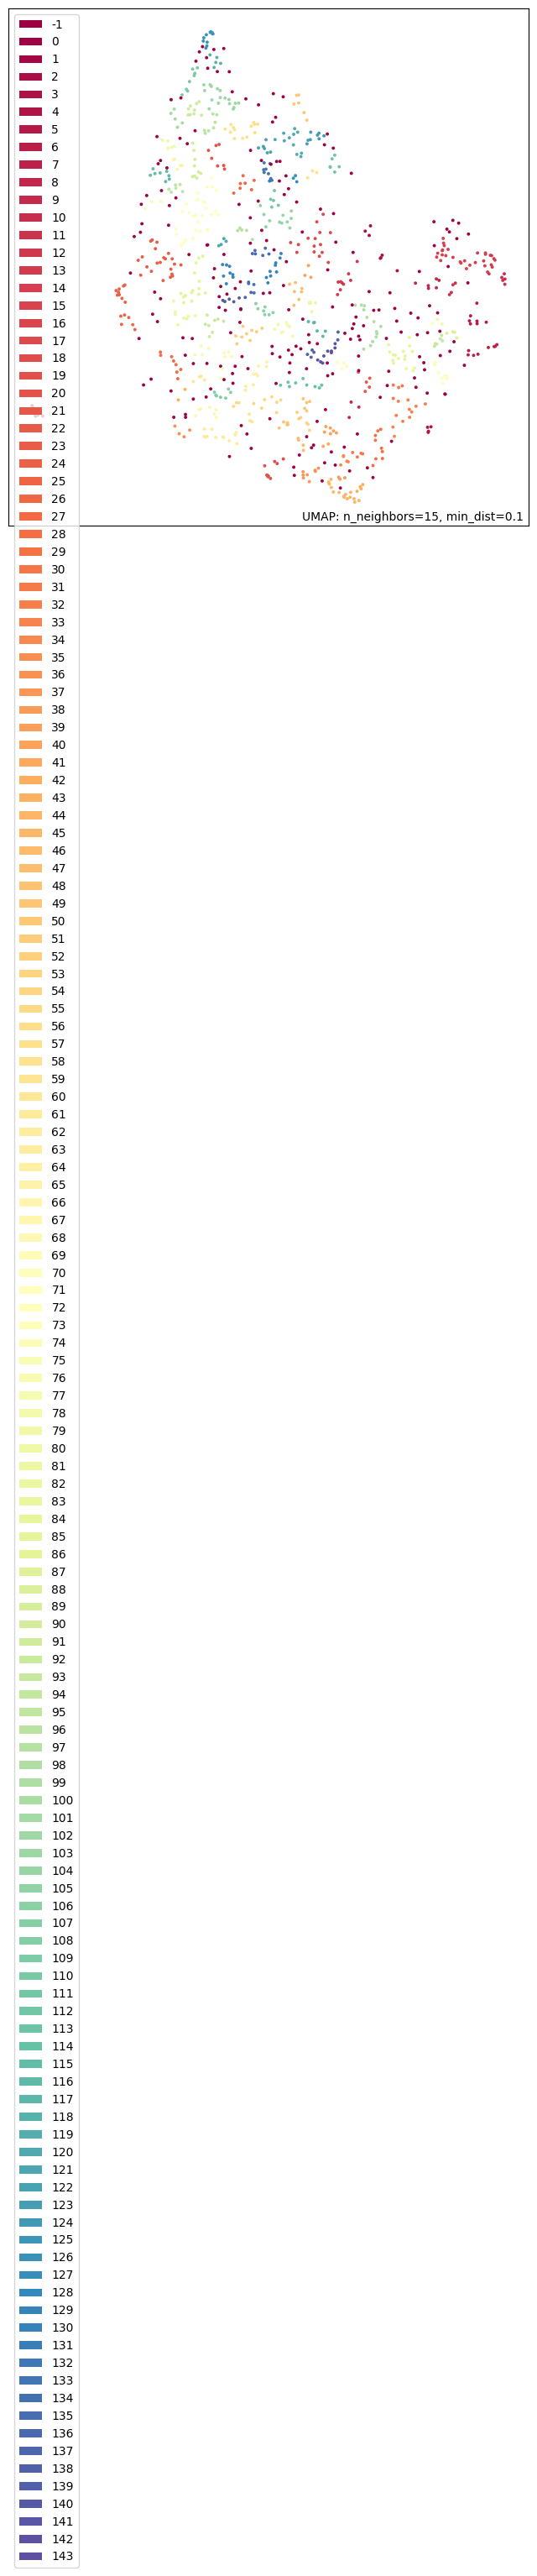

In [ ]:
umap.plot.points(embedding, labels=cluster_labels)

In [ ]:

df.loc[df["label"] == 1]

,doc,label
119,he cried.,1
216,he muttered.,1
480,he cried.,1
545,he scoffed.,1
566,he sneered.,1
601,he whispered.,1



# Supervised Learning

Supervised learning is fundamentally different from unsupervised learning. In supervised learning, we know the labels of our data. Our goal is to use that labeled data to teach a computer system to understand the key feature of our data that make it correspond to specific labels.


In a supervised learning system, our data would look like this:

SPORTS - The Boston Celtics won the championship.
SPORTS - The Dallas Cowboys lost in overtime.
SPORTS - Basketball is a sport enjoyed worldwide.
POLITICS - The Senator from Florida voted against the bill.
POLITICS - The Congressperson from New Hampshire is leaving office.
POLITICS - A bill is a type of legal document.

Here we have our data clearly labeled. This is precisely how spaCy's available pipelines work. They were trained on thousands of examples of texts that had annotations. Annotations are labels that we assign to specific tokens, or sequence of tokens, that correspond to a specific label. If we are training an NER system, our annotations will be things like: PERSON, GPE, LOC, etc.

# Annotations

In order to understand what annotations are more deeply, let's take a look at a concrete example.

In [ ]:
doc = nlp("New York is a state.")
displacy.render(doc, style="ent")

As we can see in the example above, New York is identified as a state. Let's see what this doc looks like as an annotation. To convert it to an annotation, we can use doc.to_json()

In [ ]:
doc.to_json()

{'text': 'New York is a state.',
 'ents': [{'start': 0, 'end': 8, 'label': 'GPE'}],
 'sents': [{'start': 0, 'end': 20}],
 'tokens': [{'id': 0,
   'start': 0,
   'end': 3,
   'tag': 'NNP',
   'pos': 'PROPN',
   'morph': 'Number=Sing',
   'lemma': 'New',
   'dep': 'compound',
   'head': 1},
  {'id': 1,
   'start': 4,
   'end': 8,
   'tag': 'NNP',
   'pos': 'PROPN',
   'morph': 'Number=Sing',
   'lemma': 'York',
   'dep': 'nsubj',
   'head': 2},
  {'id': 2,
   'start': 9,
   'end': 11,
   'tag': 'VBZ',
   'pos': 'AUX',
   'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin',
   'lemma': 'be',
   'dep': 'ROOT',
   'head': 2},
  {'id': 3,
   'start': 12,
   'end': 13,
   'tag': 'DT',
   'pos': 'DET',
   'morph': 'Definite=Ind|PronType=Art',
   'lemma': 'a',
   'dep': 'det',
   'head': 4},
  {'id': 4,
   'start': 14,
   'end': 19,
   'tag': 'NN',
   'pos': 'NOUN',
   'morph': 'Number=Sing',
   'lemma': 'state',
   'dep': 'attr',
   'head': 2},
  {'id': 5,
   'start': 19,
   'end'

We have a lot of data here, so let's just focus on two parts of this, the text and the ents.

In [ ]:
text = doc.to_json()["text"]
ents = doc.to_json()["ents"]

print(text)
print(ents)

New York is a state.
[{'start': 0, 'end': 8, 'label': 'GPE'}]


Here we can see what a machine learning annotation looks like for supervised learning. We have a string, a specific text, with labeled annotations. In our case, we have the entities labeled. Notice that each entity (we only have 1) has a dictionary which has 3 keys: start, end, and label. The start and end correspond to the start and end characters here. The label corresponds to the appropriate label for the thing that falls within that span of characters. In our case, this is `New York`.

Later, we will be learning how to cultivate annotations like this with our own data.

## Model Bias

SpaCy provides numerous open-source pipelines and models for users for many languages. These models are, however, biased. In order to understand what this means and why it is important, let's take a look at a simple example.

In [ ]:
doc = nlp("John went to the store.")

Our text is simple: `John went to the store.` THe only entity we have in this is `John` who should be identified as `PERSON`

In [ ]:
displacy.render(doc, style="ent")

As we can see, the spaCy model has identified this perfectly for us. Why is that? The reason lies in the data that the model was trained on. The model was trained on a lot of English texts and John is a very common name in English. Therefore, the model, as one would expect, does well at predicting that John is a person. It is able to do this likely because it has memorized that John always functions as a name.

Let's see how it performs with a South African name.

In [ ]:
doc = nlp("Zuri went to the store.")
displacy.render(doc, style="ent")

As we can see, we have a false positive for Zuri as a GPE, rather than PERSON. This is an expected error for a few reasons. First, the model is biased towards Western English. When we speak about model biases, we are speaking about its tendency to fare better on specific types of data or model towards certain conclusions inconsistently. All models are biased because all data is biased as are all datasets. Without constraints, models can very easily replicate the biases of humans. In our case, the `en_core_web_sm` is biased towards Western names because it saw more Western names in the training data.

Let's take a look at what these annotations look like, though. 

# Word Vectors